In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Primeiro Modelo sem alterações

Acurácia média: 0.9072
Precisão média: 0.9581
Recall médio: 0.7980
F1-score médio: 0.8706


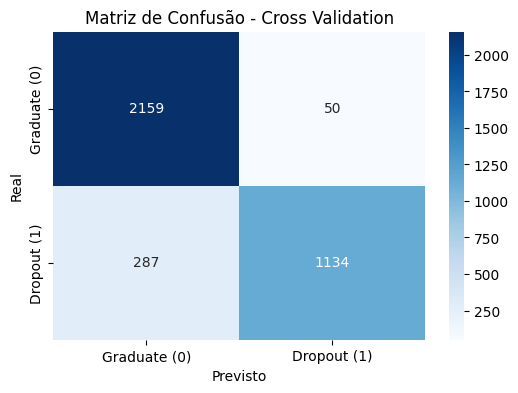

In [3]:
df = pd.read_csv("datasetRAW.csv", sep = ",")

df = df[df['Target'] != 'Enrolled']

x = df.drop(columns=['Target'])
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

x.shape, y.shape

#Modelo
modelo = LinearRegression()

#Normalização dos dados para que o algoritmo não de mais importância a valores como idade = 70 em vez de Creaditos aprovados = 18
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

matriz_confusao_acumulada = np.zeros((2, 2))

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Listas para registar os resultados para depois serem feitas as médias
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i_train, i_test in kf.split(x_scaled, y):
    x_train, x_test = x_scaled.iloc[i_train], x_scaled.iloc[i_test] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    #Treino do modelo
    modelo.fit(x_train, y_train)

    #Resultado de valores continuos uma vez que estamos a usar regressão linear
    res_continuos = modelo.predict(x_test) #Retorna apenas os resultados da previsão

   

    #Converter de valores continuos para Valores Binários, problema de regressão para problema de classificação
    intervalo_de_admissao = 0.5
    res_binario = (res_continuos >= intervalo_de_admissao).astype(int)

    matriz_confusao_acumulada += confusion_matrix(y_test, res_binario)

    #Calculo de Metricas
    accuracy_list.append(accuracy_score(y_test, res_binario))
    precision_list.append(precision_score(y_test, res_binario))
    recall_list.append(recall_score(y_test, res_binario))
    f1_list.append(f1_score(y_test, res_binario))

print(f"Acurácia média: {np.mean(accuracy_list):.4f}")
print(f"Precisão média: {np.mean(precision_list):.4f}")
print(f"Recall médio: {np.mean(recall_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")


matriz_confusao_acumulada = matriz_confusao_acumulada.astype(int)
# Plotar a matriz de confusão final
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_acumulada, annot=True, fmt='d', cmap="Blues", xticklabels=["Graduate (0)", "Dropout (1)"], yticklabels=["Graduate (0)", "Dropout (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Cross Validation")
plt.show()

### Modelo sem a coluna Nacionalidade

Acurácia média: 0.9072
Precisão média: 0.9581
Recall médio: 0.7980
F1-score médio: 0.8706


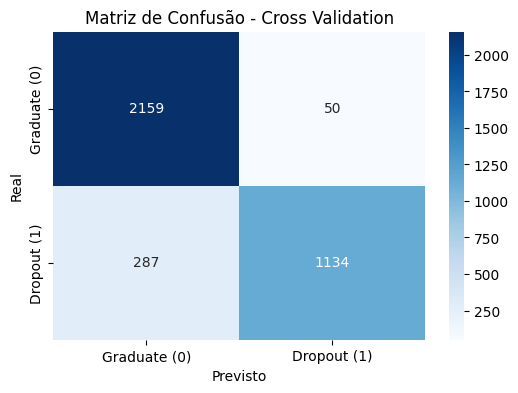

In [7]:
df = pd.read_csv("datasetRAW.csv", sep = ",")

df = df[df['Target'] != 'Enrolled']

x = df.drop(columns=['Target', 'Nacionality'])
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

x.shape, y.shape

#Modelo
modelo = LinearRegression()

#Normalização dos dados para que o algoritmo não de mais importância a valores como idade = 70 em vez de Creaditos aprovados = 18
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

matriz_confusao_acumulada = np.zeros((2, 2))

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Listas para registar os resultados para depois serem feitas as médias
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i_train, i_test in kf.split(x_scaled, y):
    x_train, x_test = x_scaled.iloc[i_train], x_scaled.iloc[i_test] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    #Treino do modelo
    modelo.fit(x_train, y_train)

    #Resultado de valores continuos uma vez que estamos a usar regressão linear
    res_continuos = modelo.predict(x_test) #Retorna apenas os resultados da previsão

    #Converter de valores continuos para Valores Binários, problema de regressão para problema de classificação
    intervalo_de_admissao = 0.5
    res_binario = (res_continuos >= intervalo_de_admissao).astype(int)

    matriz_confusao_acumulada += confusion_matrix(y_test, res_binario)

    #Calculo de Metricas
    accuracy_list.append(accuracy_score(y_test, res_binario))
    precision_list.append(precision_score(y_test, res_binario))
    recall_list.append(recall_score(y_test, res_binario))
    f1_list.append(f1_score(y_test, res_binario))

print(f"Acurácia média: {np.mean(accuracy_list):.4f}")
print(f"Precisão média: {np.mean(precision_list):.4f}")
print(f"Recall médio: {np.mean(recall_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

matriz_confusao_acumulada = matriz_confusao_acumulada.astype(int)
# Plotar a matriz de confusão final
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_acumulada, annot=True, fmt='d', cmap="Blues", xticklabels=["Graduate (0)", "Dropout (1)"], yticklabels=["Graduate (0)", "Dropout (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Cross Validation")
plt.show()


### Modelo com Media entre Cadeiras Creditadas e Cadeiras Inscritas

Acurácia média: 0.9077
Precisão média: 0.9605
Recall médio: 0.7973
F1-score médio: 0.8712


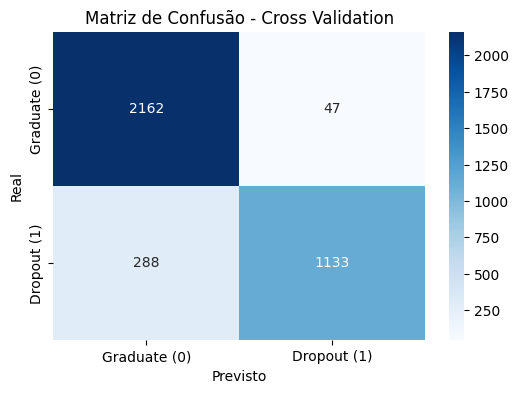

In [6]:
df["Media_Creditada"] = df[["Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)"]].mean(axis=1)  # Calcula a média linha a linha
df["Media_Incrita"] = df[["Curricular units 1st sem (enrolled)","Curricular units 2nd sem (enrolled)"]].mean(axis=1)

x = df.drop(columns=['Target', 'Nacionality',"Curricular units 1st sem (credited)","Curricular units 2nd sem (credited)","Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"])
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

x.shape, y.shape

#Modelo
modelo = LinearRegression()

#Normalização dos dados para que o algoritmo não de mais importância a valores como idade = 70 em vez de Creaditos aprovados = 18
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

matriz_confusao_acumulada = np.zeros((2, 2))

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Listas para registar os resultados para depois serem feitas as médias
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i_train, i_test in kf.split(x_scaled, y):
    x_train, x_test = x_scaled.iloc[i_train], x_scaled.iloc[i_test] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    #Treino do modelo
    modelo.fit(x_train, y_train)

    #Resultado de valores continuos uma vez que estamos a usar regressão linear
    res_continuos = modelo.predict(x_test) #Retorna apenas os resultados da previsão

    #Converter de valores continuos para Valores Binários, problema de regressão para problema de classificação
    intervalo_de_admissao = 0.5
    res_binario = (res_continuos >= intervalo_de_admissao).astype(int)

    matriz_confusao_acumulada += confusion_matrix(y_test, res_binario)

    #Calculo de Metricas
    accuracy_list.append(accuracy_score(y_test, res_binario))
    precision_list.append(precision_score(y_test, res_binario))
    recall_list.append(recall_score(y_test, res_binario))
    f1_list.append(f1_score(y_test, res_binario))

print(f"Acurácia média: {np.mean(accuracy_list):.4f}")
print(f"Precisão média: {np.mean(precision_list):.4f}")
print(f"Recall médio: {np.mean(recall_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

matriz_confusao_acumulada = matriz_confusao_acumulada.astype(int)
# Plotar a matriz de confusão final
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_acumulada, annot=True, fmt='d', cmap="Blues", xticklabels=["Graduate (0)", "Dropout (1)"], yticklabels=["Graduate (0)", "Dropout (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Cross Validation")
plt.show()


## Teste com diferentes niveis de Threshold

Acurácia média: 0.8989
Precisão média: 0.9741
Recall médio: 0.7622
F1-score médio: 0.8551


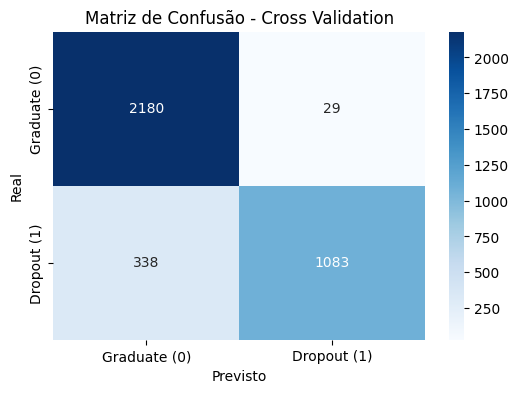

In [5]:
df["Media_Creditada"] = df[["Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)"]].mean(axis=1)  # Calcula a média linha a linha
df["Media_Incrita"] = df[["Curricular units 1st sem (enrolled)","Curricular units 2nd sem (enrolled)"]].mean(axis=1)

x = df.drop(columns=['Target', 'Nacionality',"Curricular units 1st sem (credited)","Curricular units 2nd sem (credited)","Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"])
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

x.shape, y.shape

#Modelo
modelo = LinearRegression()

#Normalização dos dados para que o algoritmo não de mais importância a valores como idade = 70 em vez de Creaditos aprovados = 18
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

matriz_confusao_acumulada = np.zeros((2, 2))

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Listas para registar os resultados para depois serem feitas as médias
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i_train, i_test in kf.split(x_scaled, y):
    x_train, x_test = x_scaled.iloc[i_train], x_scaled.iloc[i_test] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    #Treino do modelo
    modelo.fit(x_train, y_train)

    #Resultado de valores continuos uma vez que estamos a usar regressão linear
    res_continuos = modelo.predict(x_test) #Retorna apenas os resultados da previsão

    #Converter de valores continuos para Valores Binários, problema de regressão para problema de classificação
    intervalo_de_admissao = 0.55
    res_binario = (res_continuos >= intervalo_de_admissao).astype(int)

    matriz_confusao_acumulada += confusion_matrix(y_test, res_binario)

    #Calculo de Metricas
    accuracy_list.append(accuracy_score(y_test, res_binario))
    precision_list.append(precision_score(y_test, res_binario))
    recall_list.append(recall_score(y_test, res_binario))
    f1_list.append(f1_score(y_test, res_binario))

print(f"Acurácia média: {np.mean(accuracy_list):.4f}")
print(f"Precisão média: {np.mean(precision_list):.4f}")
print(f"Recall médio: {np.mean(recall_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

matriz_confusao_acumulada = matriz_confusao_acumulada.astype(int)
# Plotar a matriz de confusão final
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_acumulada, annot=True, fmt='d', cmap="Blues", xticklabels=["Graduate (0)", "Dropout (1)"], yticklabels=["Graduate (0)", "Dropout (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Cross Validation")
plt.show()

Acurácia média: 0.8887
Precisão média: 0.9831
Recall médio: 0.7284
F1-score médio: 0.8366


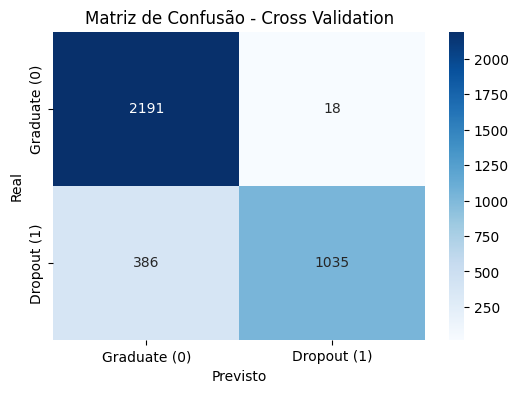

In [4]:
df["Media_Creditada"] = df[["Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)"]].mean(axis=1)  # Calcula a média linha a linha
df["Media_Incrita"] = df[["Curricular units 1st sem (enrolled)","Curricular units 2nd sem (enrolled)"]].mean(axis=1)

x = df.drop(columns=['Target', 'Nacionality',"Curricular units 1st sem (credited)","Curricular units 2nd sem (credited)","Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"])
y = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

x.shape, y.shape

#Modelo
modelo = LinearRegression()

matriz_confusao_acumulada = np.zeros((2, 2))

#Normalização dos dados para que o algoritmo não de mais importância a valores como idade = 70 em vez de Creaditos aprovados = 18
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Listas para registar os resultados para depois serem feitas as médias
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i_train, i_test in kf.split(x_scaled, y):
    x_train, x_test = x_scaled.iloc[i_train], x_scaled.iloc[i_test] #iloc permite usar linhas/colunas especificas do data set conforme o index
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    #Treino do modelo
    modelo.fit(x_train, y_train)

    #Resultado de valores continuos uma vez que estamos a usar regressão linear
    res_continuos = modelo.predict(x_test) #Retorna apenas os resultados da previsão

    #Converter de valores continuos para Valores Binários, problema de regressão para problema de classificação
    intervalo_de_admissao = 0.6
    res_binario = (res_continuos >= intervalo_de_admissao).astype(int)

    # Atualizar matriz de confusão acumulada
    matriz_confusao_acumulada += confusion_matrix(y_test, res_binario)

    #Calculo de Metricas
    accuracy_list.append(accuracy_score(y_test, res_binario))
    precision_list.append(precision_score(y_test, res_binario))
    recall_list.append(recall_score(y_test, res_binario))
    f1_list.append(f1_score(y_test, res_binario))

print(f"Acurácia média: {np.mean(accuracy_list):.4f}")
print(f"Precisão média: {np.mean(precision_list):.4f}")
print(f"Recall médio: {np.mean(recall_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")


matriz_confusao_acumulada = matriz_confusao_acumulada.astype(int)
# Plotar a matriz de confusão final
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao_acumulada, annot=True, fmt='d', cmap="Blues", xticklabels=["Graduate (0)", "Dropout (1)"], yticklabels=["Graduate (0)", "Dropout (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Cross Validation")
plt.show()